# Binary Classification

Spam Detection: Spam(1) or Ham(0)

Facebook feed : show(1) or hide(0)

Credit Card Fradulent Transaction detection: legitimate(1) or fraud(0) // 이전 패턴과 다를 때


위와 같은 것들은 Linear regression ( H(x) = Wx+b ) 적용 안됨 ( y 값이 두 개의 값 말고도 다른 값이 나올 수 있다. )

-> y 값이 Binary Classification은 정해져있기 때문!!!( 0, 1 과 같이 )

-> SIGMOID 함수 !!

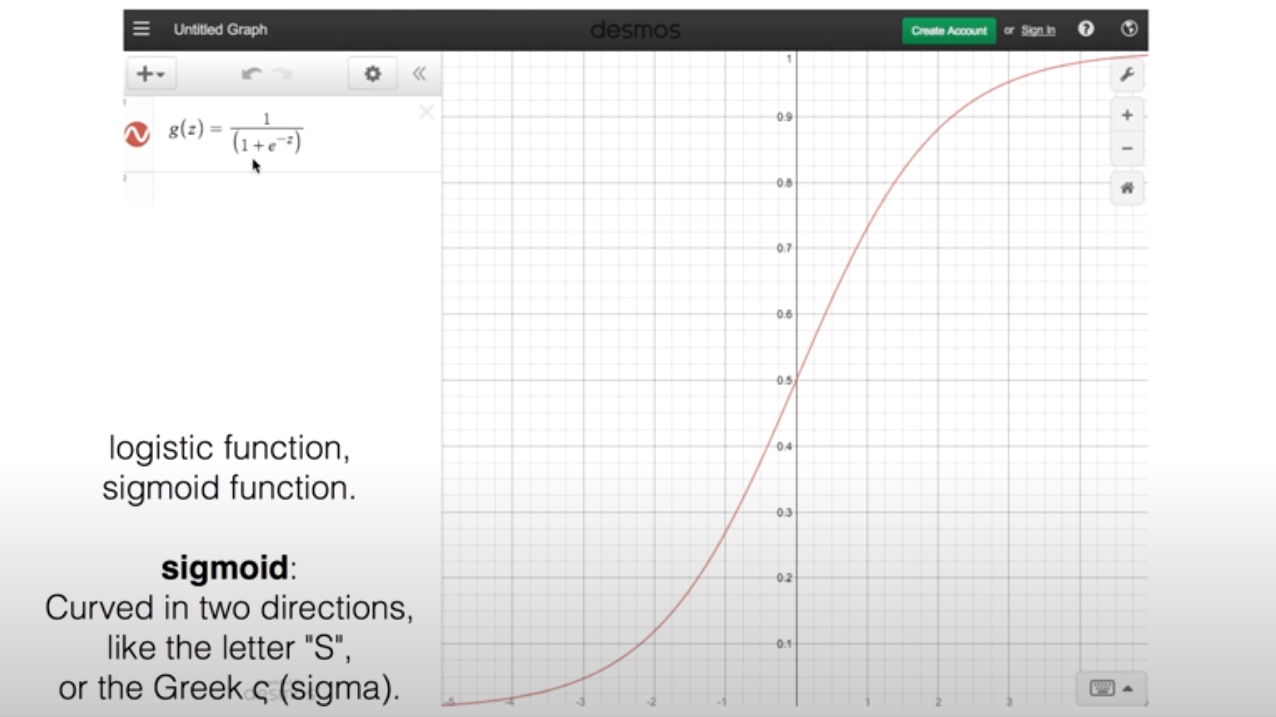

# z=WX , H(x)= g(z)

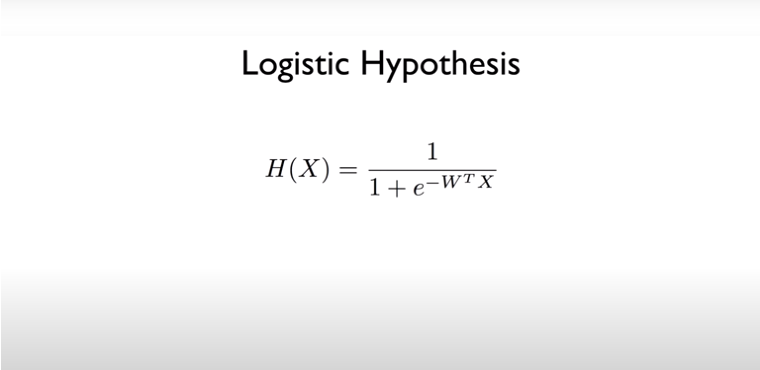

새로 생각한 H(X)가 최종적으로 전체의 최소인 global minimum을 찾아야하는데 중간에 있는 Local minimum을 찾을 수도 있다.

--> 사용할 수 없어!! cost 함수 바꿔야됨!!

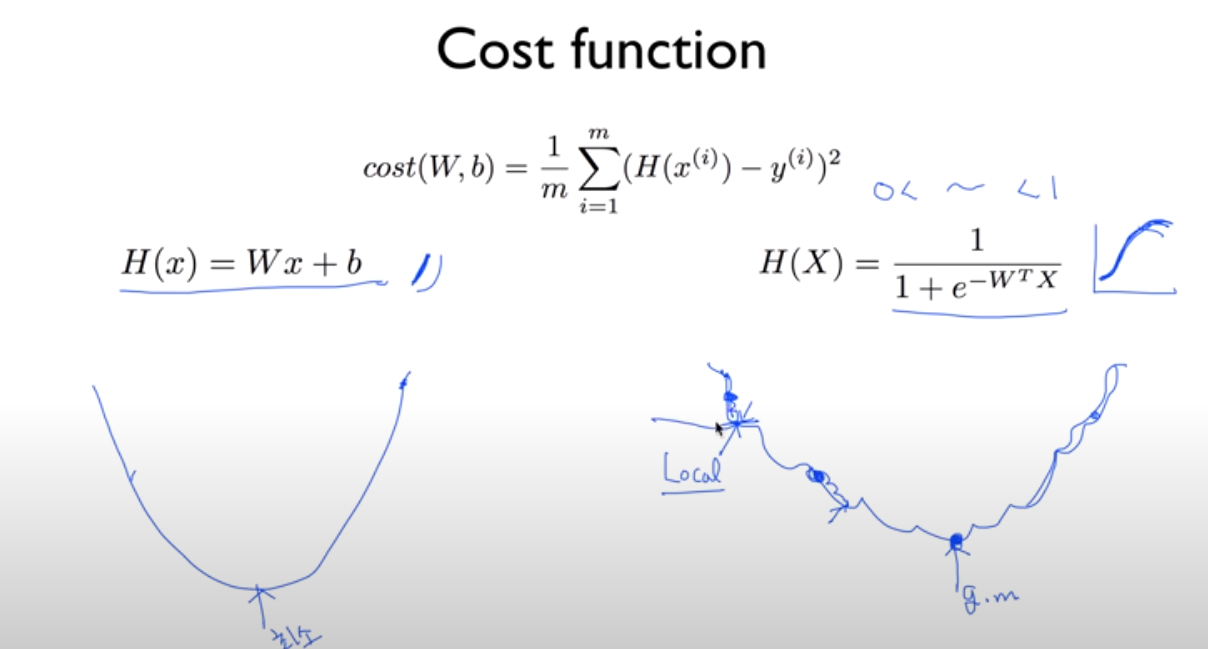

 # log 함수를 이용하여 새로운 cost function을 만들어낸다.
 
 y=1 일때, 맞았을 경우 cost = 0 으로 최소가 되고 틀렸을 경우 cost = 무한대
 
y=0 일때, 맞았을 경우 cost = 0 으로 최소가 되고 틀렸을 경우 cost = 무한대
 
  

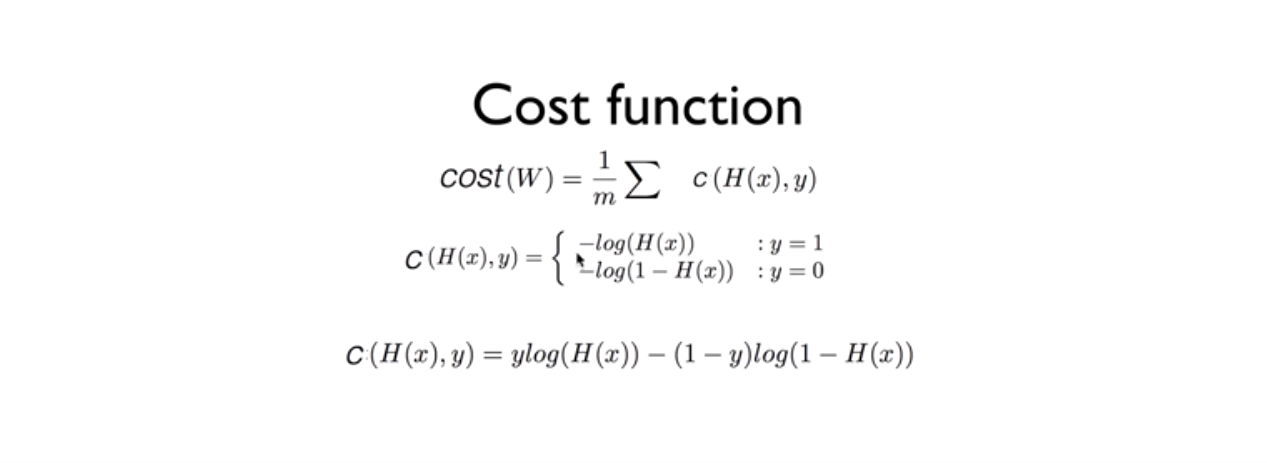

# Gradient decent algorithm

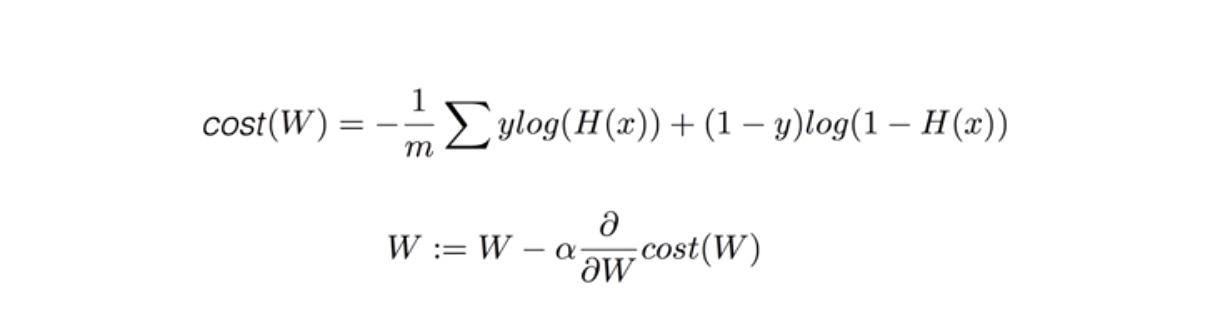

In [1]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],[2, 3],[3, 1],[4, 3],[5, 3],[6, 2]]
y_data = [[0],[0],[0],[1],[1],[1]] # 결과값이 Binary 이다.

# x 와 y 데이터의 자료형 
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# 똑같이 weight와 bias 를 만들어준다
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# binary classification이기 때문에 시그모이드 함수 이용!
# tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost 함수를 위의 식처럼 만들어준다
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

# Gradient decent algorithm 을 learning_rate 0.01로 만들어준다.
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 0.5 이상이면 
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

Instructions for updating:
non-resource variables are not supported in the long term
0 0.7430492
200 0.42184696
400 0.38231477
600 0.35910198
800 0.34285858
1000 0.33000973
1200 0.31902754
1400 0.3091982
1600 0.30016214
1800 0.2917262
2000 0.2837787
2200 0.2762507
2400 0.26909593
2600 0.26228073
2800 0.25577927
3000 0.2495699
3200 0.24363393
3400 0.23795496
3600 0.23251796
3800 0.22730912
4000 0.22231567
4200 0.21752574
4400 0.21292813
4600 0.20851254
4800 0.20426922
5000 0.20018904
5200 0.19626339
5400 0.19248433
5600 0.18884428
5800 0.18533619
6000 0.18195343
6200 0.17868976
6400 0.1755393
6600 0.17249656
6800 0.1695564
7000 0.16671388
7200 0.16396447
7400 0.16130377
7600 0.15872784
7800 0.1562327
8000 0.15381491
8200 0.15147088
8400 0.1491974
8600 0.14699145
8800 0.14485018
9000 0.1427708
9200 0.14075069
9400 0.13878746
9600 0.13687888
9800 0.13502258
10000 0.1332165

Hypothesis:  [[0.02420241]
 [0.14891222]
 [0.27185944]
 [0.79689527]
 [0.9489273 ]
 [0.98335063]] 
Correct (Y):  [[0